In [257]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV





In [258]:
# Reads a CSV file
Churn_Data= pd.read_csv('C:\\Users\\hp\\Desktop\\CODSOFT\\CUSTOMER CHURN  PREDICTION\\Churn_Modelling.csv')
Churn_Data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [259]:
#information about the DataFrame Churn_Data
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [260]:
# function provides a statistical summary of the DataFrame Churn_Data
Churn_Data.describe(include='all')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [261]:
#Missing values in the DataFrame Churn_Data
Churn_Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [262]:
#Columns List
Churn_Data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [263]:
#Calculates the number of duplicate values in the 'CustomerId' column of DataFrame 
Churn_Data['CustomerId'].duplicated(keep=False).sum()

0

In [264]:
#the result is 0, it means that there are no duplicate customer IDs in the dataset ,each value in the 'CustomerId' column is unique.
#so we can drop the "CustomerId"
new_Churn_Data = Churn_Data.drop(['RowNumber', 'Surname','CustomerId'],axis=1)

In [265]:
new_Churn_Data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


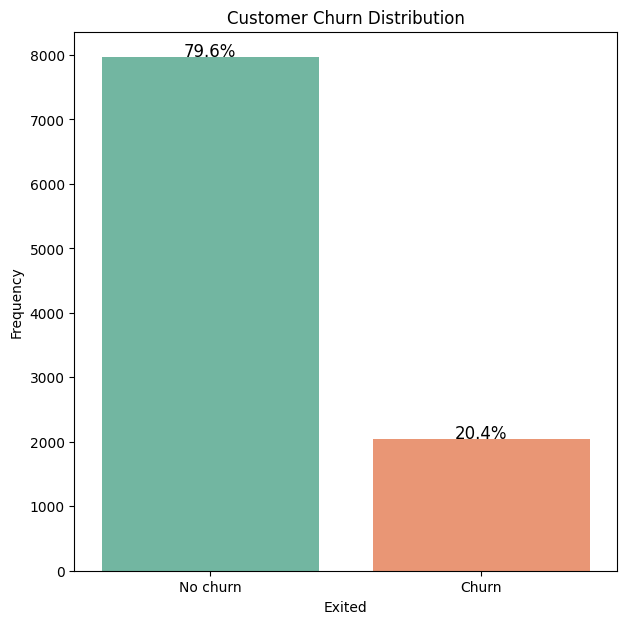

In [266]:
churn_count = new_Churn_Data['Exited'].value_counts()

fig, ax = plt.subplots(figsize=(7,7))
color_palette = sns.color_palette('Set2')
  # Change the color palette here
sns.barplot(x=churn_count.index, 
            y=churn_count.values,
            palette=color_palette
            ).set(
                xticks=range(2),
                xticklabels=["No churn", "Churn"],
                xlabel='Exited',
                ylabel='Frequency',
                title='Customer Churn Distribution'
             )

# Add percentage labels
total_count = sum(churn_count.values)
for i, count in enumerate(churn_count.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

plt.show()

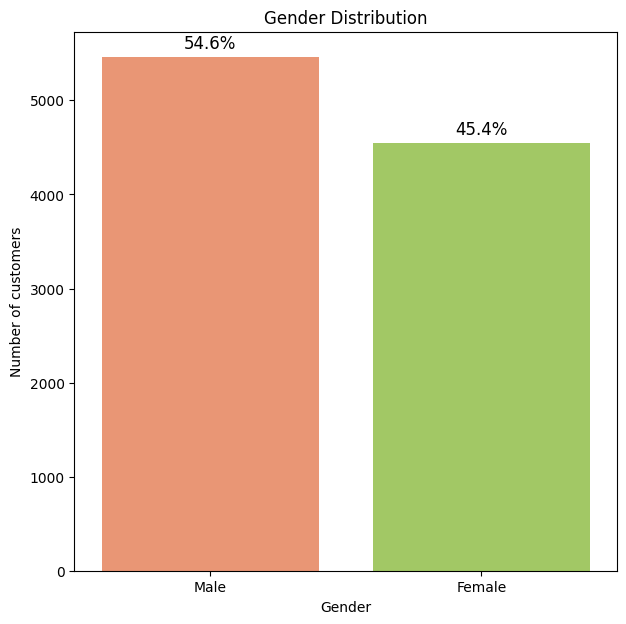

In [267]:
#Visualizing gender Distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 7))
color_palette = sns.color_palette('Set2')
# Change the color palette here
sns.barplot(x=new_Churn_Data['Gender'].value_counts().index, 
            y=new_Churn_Data['Gender'].value_counts().values,
            palette=[color_palette[1], color_palette[4]] 
# Change the colors here
            ).set(
                ylabel='Number of customers',
                xlabel='Gender',
                title='Gender Distribution'
            )

# Add percentage labels
gender_counts = new_Churn_Data['Gender'].value_counts()
total_count = sum(gender_counts.values)
for i, count in enumerate(gender_counts.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count + 50, f'{percentage}%', ha='center', va='bottom', size=12) 
# Adjust the text position here

plt.show()


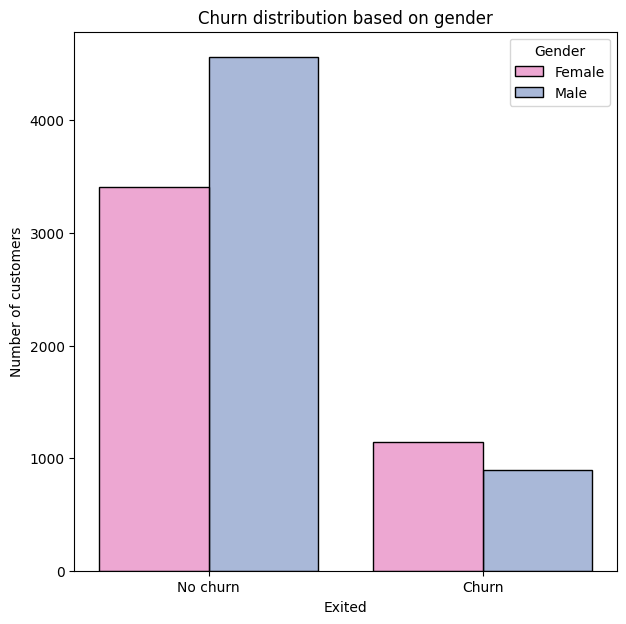

In [268]:
#Visualizing Churn distribution based on gender

fig, ax = plt.subplots(figsize=(7,7))
color_palette = sns.color_palette('Set2')  # Change the color palette here
sns.histplot(new_Churn_Data, x='Exited', 
             bins=np.arange(3) - 0.5,
             hue='Gender', 
             multiple='dodge',
             shrink=.8,
             legend=True,
             palette=[color_palette[3], color_palette[2]]  # Change the colors here
             ).set(
                xticks=range(2),
                xticklabels=["No churn", "Churn"],
                ylabel='Number of customers',
                title='Churn distribution based on gender'
             )

plt.show()



In [269]:
# Create age bins
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
new_Churn_Data['Age Group'] = pd.cut(new_Churn_Data['Age'], bins=bins, labels=labels, right=False)

# Print the modified DataFrame
new_Churn_Data
# Assuming new_Churn_Data is your DataFrame with the 'Age Group' column


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50


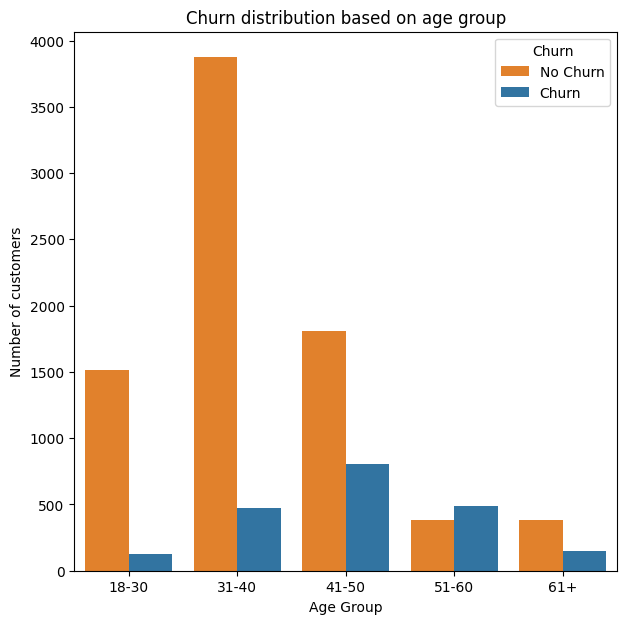

In [270]:
fig, ax = plt.subplots(figsize=(7, 7))

# Define custom colors
color_palette = ['#FF7F0E', '#1F77B4']  

# Orange and blue colors
sns.countplot(data=new_Churn_Data, x='Age Group', hue='Exited', palette=color_palette)

ax.set(xlabel='Age Group', ylabel='Number of customers', title='Churn distribution based on age group')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

plt.show()

In [271]:
new_Churn_Data.drop(['Age Group'], axis=1, inplace=True)
new_Churn_Data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [272]:
#Split the data into features X and target variable Y
X = new_Churn_Data.drop('Exited', axis=1)
Y = new_Churn_Data['Exited']

In [273]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [274]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [275]:
geography_values = new_Churn_Data['Geography'].unique()
geography_values


array(['France', 'Spain', 'Germany'], dtype=object)

In [276]:
#Encode categorical features
categorical_features = ['Geography', 'Gender']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [277]:
X_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [278]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.25, random_state=22)

In [279]:
#the StandardScaler scales the features so that they have a mean of 0 and a standard deviation of 1, this transformation ensures that the features are centered around zero and have similar variances. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [280]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [281]:
#Initialize the Random Forest classifier
Random_Forest_Classifier = RandomForestClassifier()

In [282]:
#Train the Random Forest classifier
Random_Forest_Classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [283]:
#Perform grid search with cross-validation
grid_search = GridSearchCV(Random_Forest_Classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#Retrieve the best hyperparameter values found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [284]:
#Retrieve the best model found by grid search
best_model = grid_search.best_estimator_

#Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

In [341]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:{:.2f} %".format(accuracy * 100))
print("Precision:{:.2f} %".format(precision * 100))


Accuracy:86.36 %
Precision:77.62 %


In [342]:
#Calculate the confusion matrix
confus_matrix = confusion_matrix(y_test, y_pred)
confus_matrix


array([[1944,   62],
       [ 279,  215]], dtype=int64)

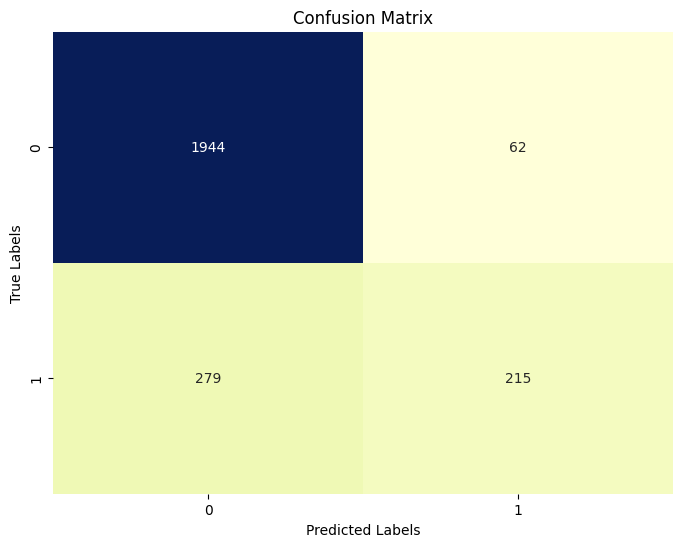

In [343]:
#Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confus_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [344]:
import joblib


joblib.dump(best_model, 'best_model.pkl')

#Load the saved model
loaded_model = joblib.load('best_model.pkl')


In [363]:
#Example new data
new_data = pd.DataFrame({
    'CreditScore': [619, 608, 502, 699],
    'Age': [42, 41, 32, 39],
    'Tenure': [2, 1, 8, 1],
    'Balance': [0.00, 83807.86, 159660.80, 0.00],
    'NumOfProducts': [1, 1, 3, 2],
    'HasCrCard': [1, 0, 1, 0],
    'IsActiveMember': [1, 0, 0, 0],
    'EstimatedSalary': [101348.88, 112542.58, 113931.57, 93826.63],
    'Geography_Germany': [0, 1, 0, 0],
    'Geography_Spain': [0, 0, 1, 0],
    'Gender_Male': [0, 0, 1, 1]
})

In [364]:
new_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,0,112542.58,1,0,0
2,502,32,8,159660.80,3,1,0,113931.57,0,1,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,1


In [365]:
#Make predictions on the new data
predictions = loaded_model.predict(new_data)

#Print the predictions
for prediction in predictions:
    if prediction == 0:
        print("Customer will not churn.")
    else:
        print("Customer will churn.")

Customer will not churn.
Customer will not churn.
Customer will churn.
Customer will churn.
